<a href="https://colab.research.google.com/github/harita-gr/AI_ML_Practice/blob/main/ICT_AI_ML_LS_6_Data_Preprocessing_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Case Study

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv("/content/drive/MyDrive/repay_loans.csv")

In [5]:
data.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
0,46109,home,13672.0,0,10243,2002-04-16,2003-12-20,2.15
1,46109,credit,9794.0,0,10984,2003-10-21,2005-07-17,1.25
2,46109,home,12734.0,1,10990,2006-02-01,2007-07-05,0.68
3,46109,cash,12518.0,1,10596,2010-12-08,2013-05-05,1.24
4,46109,credit,14049.0,1,11415,2010-07-07,2012-05-21,3.13


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443 entries, 0 to 442
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   client_id    443 non-null    int64  
 1   loan_type    443 non-null    object 
 2   loan_amount  440 non-null    float64
 3   repaid       443 non-null    int64  
 4   loan_id      443 non-null    int64  
 5   loan_start   443 non-null    object 
 6   loan_end     443 non-null    object 
 7   rate         438 non-null    float64
dtypes: float64(2), int64(3), object(3)
memory usage: 27.8+ KB


In [6]:
data.shape

(443, 8)

## Missing Value Handling

In [7]:
data.isna().sum()

client_id      0
loan_type      0
loan_amount    3
repaid         0
loan_id        0
loan_start     0
loan_end       0
rate           5
dtype: int64

missing values in `loan_amount` and `rate`

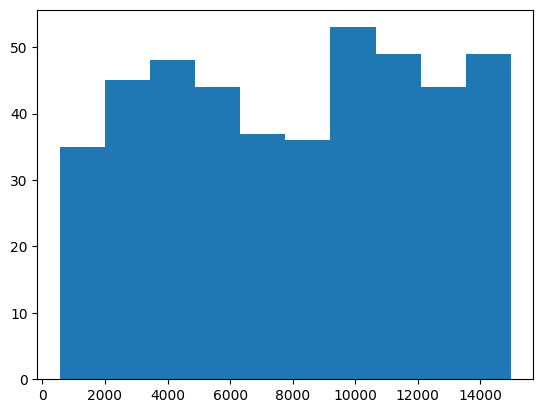

In [9]:
plt.hist(data['loan_amount'])
plt.show()

bit skewed at right.fill with median

In [10]:
data['loan_amount'] = data['loan_amount'].fillna(data['loan_amount'].median())

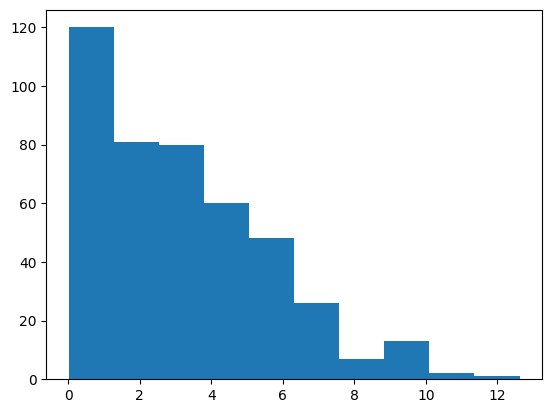

In [11]:
plt.hist(data['rate'])
plt.show()

In [12]:
data['rate'] = data['rate'].fillna(data['rate'].median())

In [13]:
data.isna().sum()

client_id      0
loan_type      0
loan_amount    0
repaid         0
loan_id        0
loan_start     0
loan_end       0
rate           0
dtype: int64

In [14]:
data.dtypes

client_id        int64
loan_type       object
loan_amount    float64
repaid           int64
loan_id          int64
loan_start      object
loan_end        object
rate           float64
dtype: object

3 `object` columns

Coverting `loan_start` & `loan_end` to `datatime` type available in pandas (Feature engineering)

In [15]:
data['loan_end'] = pd.to_datetime(data['loan_end'])
data['loan_start'] = pd.to_datetime(data['loan_start'])

In [16]:
data.dtypes

client_id               int64
loan_type              object
loan_amount           float64
repaid                  int64
loan_id                 int64
loan_start     datetime64[ns]
loan_end       datetime64[ns]
rate                  float64
dtype: object

# Outlier Handling

`loan_amount` and `rate`

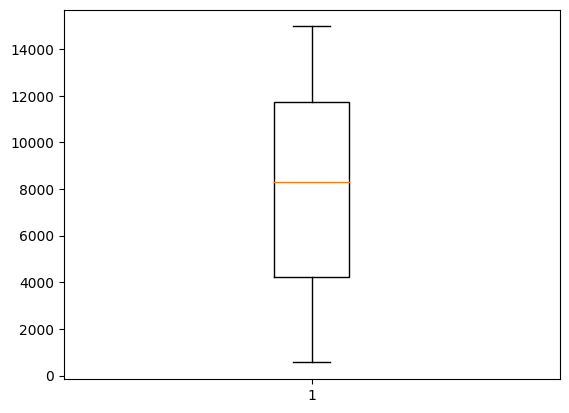

In [17]:
plt.boxplot(data['loan_amount'])
plt.show()
# o/p: there is no outlier

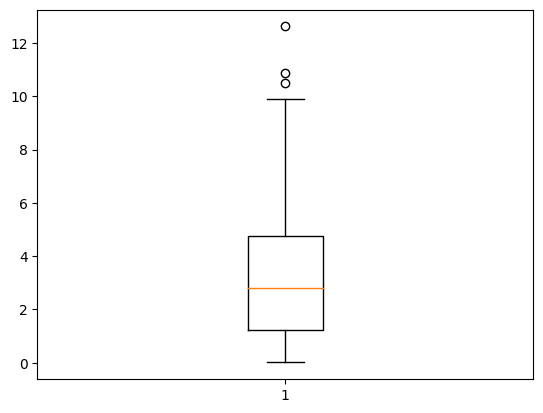

In [18]:
plt.boxplot(data['rate'])
plt.show()
# o/p: there is outlier

Various methods to handle outlier - trimming, capping, flooring etc.

In [19]:
q1 = data['rate'].quantile(0.25)
q2 = data['rate'].quantile(0.5)
q3 = data['rate'].quantile(0.75)

In [20]:
iqr = q3-q1

In [21]:
upper_limit = q3+(1.5*iqr)
lower_limit = q1-(1.5*iqr)

In [22]:
print(upper_limit,lower_limit)

10.045 -4.075


In [25]:
#taking col value and trimming it's value based on upper or lower limit
data[(data['rate'] > upper_limit) | (data['rate']<lower_limit )].index

Int64Index([41, 195, 421], dtype='int64')

These 3 index values are outliers. Drop those rows => TRIMMING

In [26]:
data.drop([41,195,421], inplace=True)

In [27]:
data.shape

(440, 8)

# Feature Engineering
Create new column. I don't want datetime cols.


In [28]:
data['loan_tenure'] = data['loan_start'] - data ['loan_end']

In [29]:
data.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,loan_tenure
0,46109,home,13672.0,0,10243,2002-04-16,2003-12-20,2.15,-613 days
1,46109,credit,9794.0,0,10984,2003-10-21,2005-07-17,1.25,-635 days
2,46109,home,12734.0,1,10990,2006-02-01,2007-07-05,0.68,-519 days
3,46109,cash,12518.0,1,10596,2010-12-08,2013-05-05,1.24,-879 days
4,46109,credit,14049.0,1,11415,2010-07-07,2012-05-21,3.13,-684 days


# Splitting Data for Training

In [30]:
data['loan_type'].unique()

array(['home', 'credit', 'cash', 'other'], dtype=object)

In [31]:
data['client_id'].nunique() # now not keeping it for model

25

In [32]:
data['loan_id'].nunique() #all values are unique. so not required for model

440

In [37]:
req_cols = ['loan_type','loan_amount', 'rate', 'loan_tenure']

In [38]:
x = data[req_cols]
y = data['repaid']

# Scaling

In [40]:
#scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [42]:
x.loc[:,['loan_amount', 'rate']] = sc.fit_transform(x[['loan_amount', 'rate']])

<ipython-input-42-b2fd8de23d66>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.loc[:,['loan_amount', 'rate']] = sc.fit_transform(x[['loan_amount', 'rate']])


In [43]:
x.head()

,loan_type,loan_amount,rate,loan_tenure
0,home,1.359358,-0.439164,-613 days
1,credit,0.430424,-0.829580,-635 days
2,home,1.134670,-1.076843,-519 days
3,cash,1.082929,-0.833918,-879 days
4,credit,1.449664,-0.014044,-684 days


# Encoding

In [44]:
#one-hot encoding
x = pd.get_dummies(x)

In [45]:
x.head()

,loan_amount,rate,loan_tenure,loan_type_cash,loan_type_credit,loan_type_home,loan_type_other
0,1.359358,-0.439164,-613 days,0,0,1,0
1,0.430424,-0.829580,-635 days,0,1,0,0
2,1.134670,-1.076843,-519 days,0,0,1,0
3,1.082929,-0.833918,-879 days,1,0,0,0
4,1.449664,-0.014044,-684 days,0,1,0,0
